In [1]:
!pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

file_path_1="C:/Users/haoyi/OneDrive/Desktop/2021年各省GDP1.xlsx"
file_path_2="C:/Users/haoyi/OneDrive/Desktop/2022年各省GDP1.xlsx"
file_path_3="C:/Users/haoyi/OneDrive/Desktop/2023年各省GDP1.xlsx"
file_path_4="C:/Users/haoyi/OneDrive/Desktop/各省简称、所属区1.xlsx"

data_2021=pd.read_excel(file_path_1)
data_2022=pd.read_excel(file_path_2)
data_2023=pd.read_excel(file_path_3)
name_data=pd.read_excel(file_path_4)

In [10]:
name_dict=dict(zip(name_data['省份'],name_data['简称']))

def standardize_province(province):
    return name_dict.get(province,province)

data_2021['省份']=data_2021['省份'].apply(standardize_province)
data_2022['省份']=data_2022['省份'].apply(standardize_province)
data_2023['省份']=data_2023['省份'].apply(standardize_province)

print(data_2021)
print("____________________________________________________________________________________________________")
print(data_2022)
print("____________________________________________________________________________________________________")
print(data_2023)

    序号 省份  GDP（亿元）
0    1  藏     2000
1    2  川    53850
2    3  滇    27147
3    4  鄂    50012
4    5  甘    10243
5    6  赣    29620
6    7  贵    19586
7    8  桂    24741
8    9  黑    14879
9   10  沪    43215
10  11  吉    13235
11  12  冀    40391
12  13  津    15695
13  14  晋    22590
14  15  京    40269
15  16  辽    27584
16  17  鲁    83096
17  18  蒙    20514
18  19  闵    48810
19  20  宁     4522
20  21  青     3346
21  22  琼     6475
22  23  陕    29801
23  24  苏   116364
24  25  皖    42959
25  26  湘    46063
26  27  新    16000
27  28  渝    27894
28  29  豫    58887
29  30  粤   124370
30  31  浙    73516
____________________________________________________________________________________________________
    序号  省份  GDP（亿元）
0    1   皖    45045
1    2   京    41611
2    3   闵    53110
3    4   甘    11202
4    5  广东   129118
5    6   桂    26301
6    7   贵    20165
7    8   琼     6818
8    9   冀    42370
9   10   豫    61345
10  11   黑    15901
11  12   鄂    53735
12  13   湘    48670
13  14   吉 

In [3]:
import pandas as pd
!pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
name_dict=dict(zip(name_data['简称'],name_data['省份']))

def standardize_province(province):
    return name_dict.get(province,province)

def remove_suffix(province_name):
    suffixes = ["市", "省", "自治区"]
    for suffix in suffixes:
        if province_name.endswith(suffix):
            province_name = province_name[:-len(suffix)]
            break
    return province_name

def read_and_process_excel(file_path, year):
    df = pd.read_excel(file_path)
    df['省份']=df['省份'].apply(standardize_province)
    df['省份'] = df['省份'].apply(remove_suffix)
    df = df.drop(columns=[col for col in df.columns if '序号' in col])
    df = df.rename(columns={col: f'{col}_{year}' for col in df.columns if col != '省份'})
    return df
file_paths = {
    2021: "C:/Users/haoyi/OneDrive/Desktop/2021年各省GDP1.xlsx",
    2022: "C:/Users/haoyi/OneDrive/Desktop/2022年各省GDP1.xlsx",
    2023: "C:/Users/haoyi/OneDrive/Desktop/2023年各省GDP1.xlsx"
}
data_frames = {year: read_and_process_excel(file, year) for year, file in file_paths.items()}
merged_df = data_frames[2022]
for year in [2021, 2023]:
    print(year)
    merged_df = merged_df.merge(data_frames[year], on='省份', how='left')
merged_df.to_excel('merged_data.xlsx', index=False)

data_frames[2022].loc[4,"省份"]
data_frames[2021].loc[29,"省份"]

2021
2023


'广东 '

In [12]:
data_frames[2022]

,省份,GDP（亿元）_2022
0,安徽,45045
1,北京,41611
2,福建,53110
3,甘肃,11202
4,广东,129118
5,广西,26301
6,贵州,20165
7,海南,6818
8,河北,42370
9,河南,61345


In [13]:
print(merged_df)

     省份  GDP（亿元）_2022  GDP（亿元）_2021  GDP（亿元）_2023
0    安徽         45045       42959.0         47051
1    北京         41611       40269.0         43761
2    福建         53110       48810.0         54355
3    甘肃         11202       10243.0         11864
4    广东        129118           NaN        135673
5    广西         26301       24741.0         27202
6    贵州         20165       19586.0         20913
7    海南          6818        6475.0          7551
8    河北         42370       40391.0         43944
9    河南         61345       58887.0         59132
10  黑龙江         15901       14879.0         15884
11   湖北         53735       50012.0         55804
12   湖南         48670       46063.0         50013
13   吉林         13070       13235.0         13531
14   江苏        122875      116364.0        128222
15   江西         32075       29620.0         32200
16   辽宁         28975       27584.0         30209
17  内蒙古         23159       20514.0         24627
18   宁夏          5070        4522.0          5315


In [14]:
file_paths = {
    2021: "C:/Users/haoyi/OneDrive/Desktop/2021年各省GDP1.xlsx",
    2022: "C:/Users/haoyi/OneDrive/Desktop/2022年各省GDP1.xlsx",
    2023: "C:/Users/haoyi/OneDrive/Desktop/2023年各省GDP1.xlsx"
}

file_paths[2021]

'C:/Users/haoyi/OneDrive/Desktop/2021年各省GDP1.xlsx'

In [3]:
import pandas as pd

file_path = "C:/Users/haoyi/OneDrive/Desktop/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd')

print(df)



     省份  GDP（亿元）_2023  GDP（亿元）_2022  GDP（亿元）_2021  GDP（亿元）_2020  GDP（亿元）_2019  \
0    北京       43760.7       41540.9       41045.6       35943.3       35445.1   
1    天津       16737.3       16132.2       15685.1       14008.0       14055.5   
2    河北       43944.1       41988.0       40397.1       36013.8       34978.6   
3    山西       25698.2       25583.9       22870.4       17835.6       16961.6   
4   内蒙古       24627.0       23388.9       21166.0       17258.0       17212.5   
5    辽宁       30209.4       28826.1       27569.5       25011.4       24855.3   
6    吉林       13531.2       12818.1       13163.8       12256.0       11726.8   
7   黑龙江       15883.9       15831.5       14858.2       13633.4       13544.4   
8    上海       47218.7       44809.1       43653.2       38963.3       37987.6   
9    江苏      128222.2      122089.3      117392.4      102807.7       98656.8   
10   浙江       82553.2       78060.6       74040.8       64689.1       62462.0   
11   安徽       47050.6       

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
merged_df['省份']=merged_df['省份'].str.strip()
gdp_2023 = merged_df[['省份', 'GDP（亿元）_2023']].copy()
gdp_2023.columns = ['省份', 'GDP_2023']

NameError: name 'merged_df' is not defined

## 2023 的数据

In [61]:
year_input = input("请输入您想要的年份: ")
year_number_input= input("请输入你想要的年数量：")

data_year=f'GDP（亿元）_{year_input}'
user_input_before=str(int(year_input)-1)
data_year_before=f'GDP（亿元）_{user_input_before}'
user_input_before_num=str(int(year_input)-int(year_number_input))
data_year_before_num=f'GDP（亿元）_{user_input_before_num}'
year_num_name=f'GDP（亿元）_

print(data_year)
print(data_year_before)
print(data_year_before_num)

请输入您想要的年份: 2022
请输入你想要的年数量：1
GDP（亿元）_2022
GDP（亿元）_2021
GDP（亿元）_2021


## 输入年份函数

In [62]:
merged_df['GDP增长_当年'] = (merged_df[data_year] - merged_df[data_year_before]) / merged_df[data_year_before] * 100
merged_df['GDP增长_近几年'] = (merged_df[data_year] - merged_df[data_year_before_num]) / merged_df[data_year_before_num] * 100

## 算出当年的增长数据和近2年的增长数据然后换成百分比的数字

In [63]:
plot_data = merged_df[['省份', data_year, 'GDP增长_当年', 'GDP增长_近几年']]
plot_data = plot_data.sort_values(by=data_year, ascending=False)

## 合到同一张表格并以当年数据为标准，降序排列

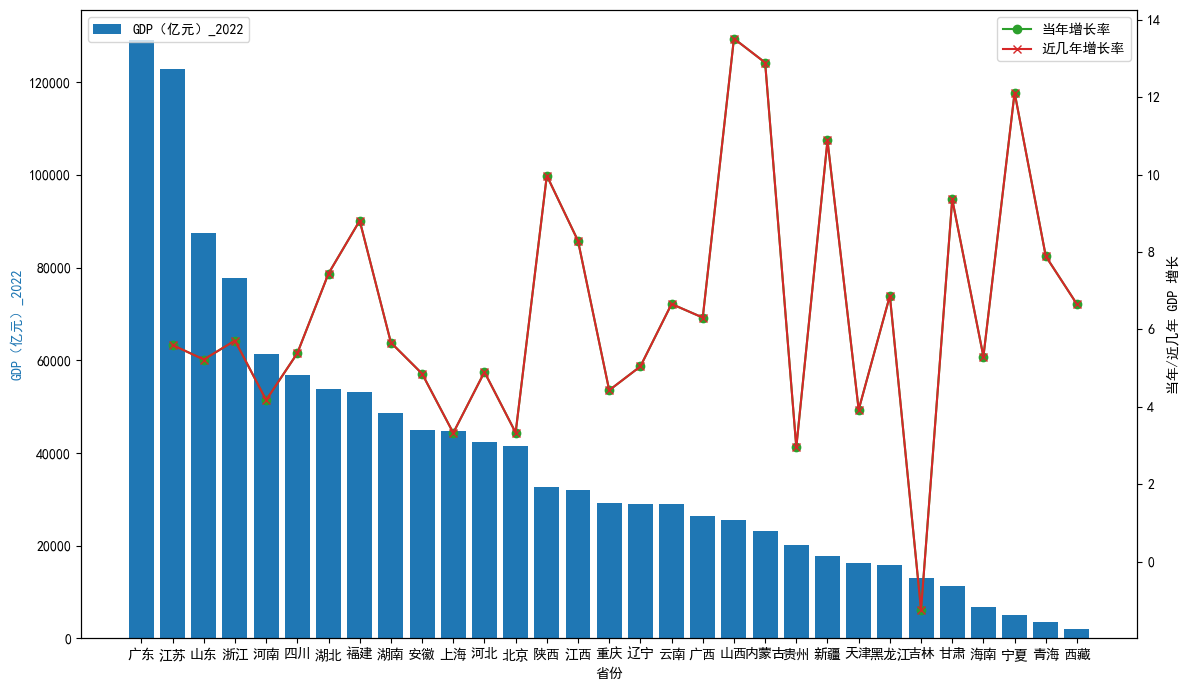

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 7))
#画初始图形

color = 'tab:blue'
ax1.set_xlabel('省份')
ax1.set_ylabel(data_year,color=color)
ax1.bar(plot_data['省份'],plot_data[data_year],color=color, label=data_year)
#画当年 GDP 体量的柱状图

ax2=ax1.twinx()
color='tab:green'
ax2.set_ylabel('当年/近几年 GDP 增长')
ax2.plot(plot_data['省份'], plot_data['GDP增长_当年'], color=color, marker='o', label='当年增长率')
#画当年 GDP 增长的折线图

color='tab:red'
ax2.plot(plot_data['省份'], plot_data['GDP增长_近几年'], color=color, marker='x', label='近几年增长率')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
#画 近2年 GDP 增长的折线图

In [3]:
!pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

def year_gdp_chart(year,num):
    data_year=f'GDP（亿元）_{year}'
    user_input_before=str(int(year)-1)
    data_year_before=f'GDP（亿元）_{user_input_before}'
    user_input_before_num=str(int(year)-int(num))
    data_year_before_num=f'GDP（亿元）_{user_input_before_num}'
    

    print(data_year)
    print(data_year_before)
    print(data_year_before_num)

    df['GDP增长_当年'] = (df[data_year] - df[data_year_before]) / df[data_year_before] * 100
    df['GDP增长_近几年'] = (df[data_year] - df[data_year_before_num]) / df[data_year_before_num] * 100

    plot_data = df[['省份', data_year, 'GDP增长_当年', 'GDP增长_近几年']]
    plot_data = plot_data.sort_values(by=data_year, ascending=False)

    fig, ax1 = plt.subplots(figsize=(12, 7))
    #画初始图形

    color = 'tab:blue'
    ax1.set_xlabel('省份')
    ax1.set_ylabel(data_year,color=color)
    ax1.bar(plot_data['省份'],plot_data[data_year],color=color, label=data_year)
    #画当年 GDP 体量的柱状图

    ax2=ax1.twinx()
    color='tab:green'
    ax2.set_ylabel('当年/近几年 GDP 增长')
    ax2.plot(plot_data['省份'], plot_data['GDP增长_当年'], color=color, marker='o', label='当年增长率')
    #画当年 GDP 增长的折线图

    color='tab:red'
    ax2.plot(plot_data['省份'], plot_data['GDP增长_近几年'], color=color, marker='x', label='近几年增长率')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

### year_gdp_chart

In [5]:
import pandas as pd

file_path = "C:/Users/haoyi/OneDrive/Desktop/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd')



year_input = input("请输入您想要的年份: ")
year_number_input= input("请输入你想要的年数量：")
year_gdp_chart(year_input,year_number_input)


KeyboardInterrupt



In [7]:
file_path_yunnan = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/云南产业.xls"
df_yunnan = pd.read_excel(file_path_yunnan, engine='xlrd')

file_path_beijing = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/北京产业.xls"
df_beijing = pd.read_excel(file_path_beijing, engine='xlrd')

file_path_jilin = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/吉林产业.xls"
df_jilin = pd.read_excel(file_path_jilin, engine='xlrd')

file_path_sichuan = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/四川产业.xls"
df_sichuan = pd.read_excel(file_path_sichuan, engine='xlrd')

file_path_anhui = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/安徽产业.xls"
df_anhui = pd.read_excel(file_path_anhui, engine='xlrd')

file_path_shandong = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/山东产业.xls"
df_shandong = pd.read_excel(file_path_shandong, engine='xlrd')

file_path_shanxi = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/山西产业.xls"
df_shanxi = pd.read_excel(file_path_shanxi, engine='xlrd')

file_path_guangdong = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/广东产业.xls"
df_guangdong = pd.read_excel(file_path_guangdong, engine='xlrd')

file_path_jiangsu = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/江苏产业.xls"
df_jiangsu = pd.read_excel(file_path_jiangsu, engine='xlrd')

file_path_jiangxi = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/江西产业.xls"
df_jiangxi = pd.read_excel(file_path_jiangxi, engine='xlrd')

file_path_hebei = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/河北产业.xls"
df_hebei = pd.read_excel(file_path_hebei, engine='xlrd')

file_path_henan = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/河南产业.xls"
df_henan = pd.read_excel(file_path_henan, engine='xlrd')

file_path_zhejiang = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/浙江产业.xls"
df_zhejiang = pd.read_excel(file_path_zhejiang, engine='xlrd')

file_path_hainan = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/海南产业.xls"
df_hainan = pd.read_excel(file_path_hainan, engine='xlrd')

file_path_hubei = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/湖北产业.xls"
df_hubei = pd.read_excel(file_path_hubei, engine='xlrd')

file_path_hunan = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/湖南产业.xls"
df_hunan = pd.read_excel(file_path_hunan, engine='xlrd')

file_path_gansu = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/甘肃产业.xls"
df_gansu = pd.read_excel(file_path_gansu, engine='xlrd')

file_path_fujian = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/福建产业.xls"
df_fujian = pd.read_excel(file_path_fujian, engine='xlrd')

file_path_guizhou = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/贵州产业.xls"
df_guizhou = pd.read_excel(file_path_guizhou, engine='xlrd')

file_path_liaoning = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/辽宁产业.xls"
df_liaoning = pd.read_excel(file_path_liaoning, engine='xlrd')

file_path_shanxi2 = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/陕西产业.xls"
df_shanxi2 = pd.read_excel(file_path_shanxi2, engine='xlrd')

file_path_qinghai = "C:/Users/haoyi/OneDrive/Desktop/要用的数据/青海产业.xls"
df_qinghai = pd.read_excel(file_path_qinghai, engine='xlrd')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

province_data = {
    "yunnan": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/云南产业.xls", engine='xlrd'),
    "beijing": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/北京产业.xls", engine='xlrd'),
    "jilin": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/吉林产业.xls", engine='xlrd'),
    "sichuan": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/四川产业.xls", engine='xlrd'),
    "anhui": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/安徽产业.xls", engine='xlrd'),
    "shandong": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/山东产业.xls", engine='xlrd'),
    "shanxi": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/山西产业.xls", engine='xlrd'),
    "guangdong": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/广东产业.xls", engine='xlrd'),
    "jiangsu": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/江苏产业.xls", engine='xlrd'),
    "jiangxi": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/江西产业.xls", engine='xlrd'),
    "hebei": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/河北产业.xls", engine='xlrd'),
    "henan": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/河南产业.xls", engine='xlrd'),
    "zhejiang": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/浙江产业.xls", engine='xlrd'),
    "hainan": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/海南产业.xls", engine='xlrd'),
    "hubei": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/湖北产业.xls", engine='xlrd'),
    "hunan": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/湖南产业.xls", engine='xlrd'),
    "gansu": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/甘肃产业.xls", engine='xlrd'),
    "fujian": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/福建产业.xls", engine='xlrd'),
    "guizhou": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/贵州产业.xls", engine='xlrd'),
    "liaoning": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/辽宁产业.xls", engine='xlrd'),
    "shanxi2": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/陕西产业.xls", engine='xlrd'),
    "qinghai": pd.read_excel("C:/Users/haoyi/OneDrive/Desktop/要用的数据/青海产业.xls", engine='xlrd')
}

## 选定省份与年份的产业体量的对比

In [11]:
def draw_province_year(province, year): 
    df = province_data[province]
    detail_data = df[df['年份'] == int(year)]   

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xlabel('产业')
    ax1.set_ylabel('GDP（亿元）')
    
    industries = ['第一产业', '第二产业', '第三产业']
    gdp_values = detail_data[industries].values.flatten() 
    
    ax1.bar(industries, gdp_values, color='skyblue', label=f'{year} 年 {province} 各产业增长情况')
    
    plt.title(f'{year} 年 {province} 各产业增长情况')
    plt.legend()
    plt.show()

请输入想要的省份： zhejiang
请输入想要的年份： 2009


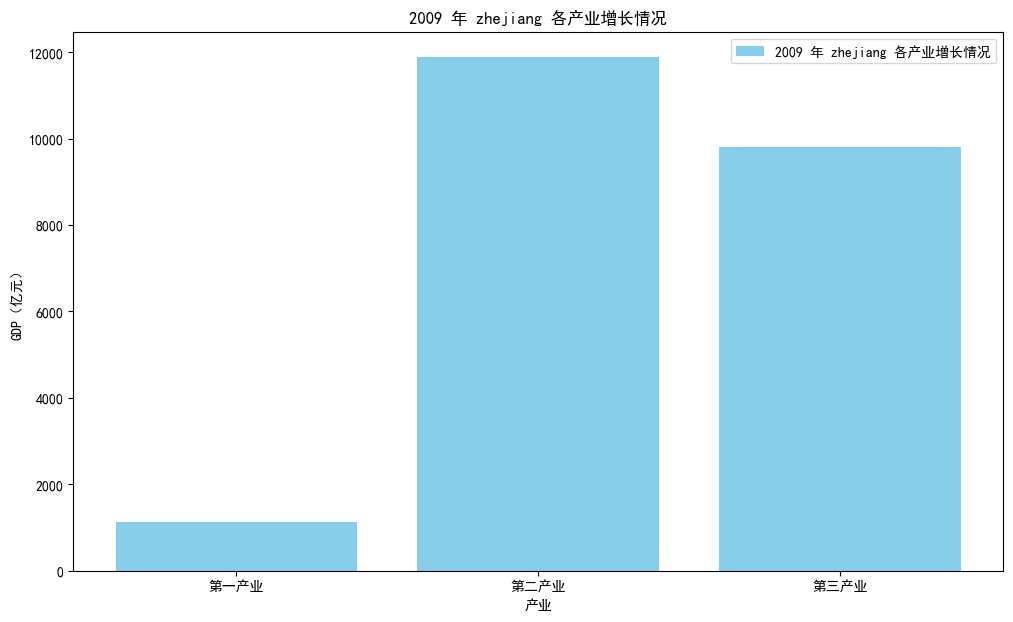

In [15]:
province_input = input("请输入想要的省份：")
year_input = input("请输入想要的年份：")

draw_province_year(province_input, year_input)

请输入想要的省份： zhejiang
请输入想要的年份： 2009


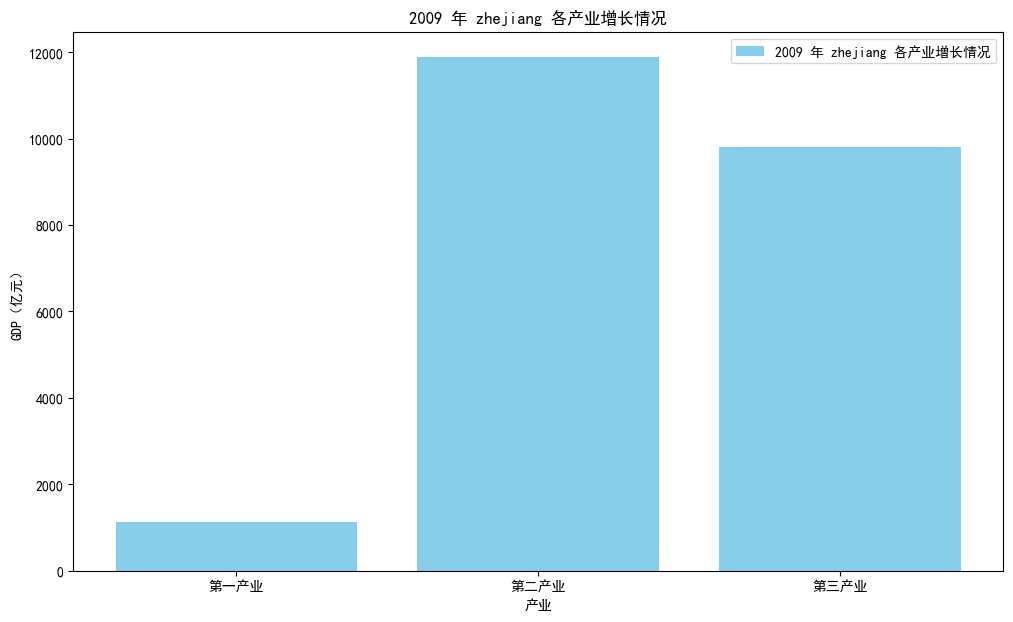

In [28]:
import pandas as pd
import os

province_input=input("请输入想要的省份：")
year_input=input("请输入想要的年份：")
draw_province_year(province_input,year_input)

## 产业函数

## 选定省份的2个不同年份的产业体量对比

In [13]:
def draw_province_year_2(province, year1, year2):
    df = province_data[province]

    data_year1 = df[df['年份'] == int(year1)]
    data_year2 = df[df['年份'] == int(year2)]

    fig, ax = plt.subplots(figsize=(12, 7))
    
    industries = ['第一产业', '第二产业', '第三产业']
    bar_width = 0.35
    index = range(len(industries))

    gdp_values_year1 = data_year1[industries].values.flatten()
    gdp_values_year2 = data_year2[industries].values.flatten()

    ax.bar([p for p in index], gdp_values_year1, bar_width, label=f'{year1} 年', color='skyblue')

    ax.bar([p + bar_width for p in index], gdp_values_year2, bar_width, label=f'{year2} 年', color='orange')

    ax.set_xlabel('产业')
    ax.set_ylabel('GDP（亿元）')
    ax.set_title(f'{year1} 年和 {year2} 年 {province} 各产业增长情况')

    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(industries)
    ax.legend()

    plt.tight_layout()
    plt.show()

请输入想要的省份名称： zhejiang
请输入想要对比的第一个年份： 2019
请输入想要对比的第二个年份： 2023


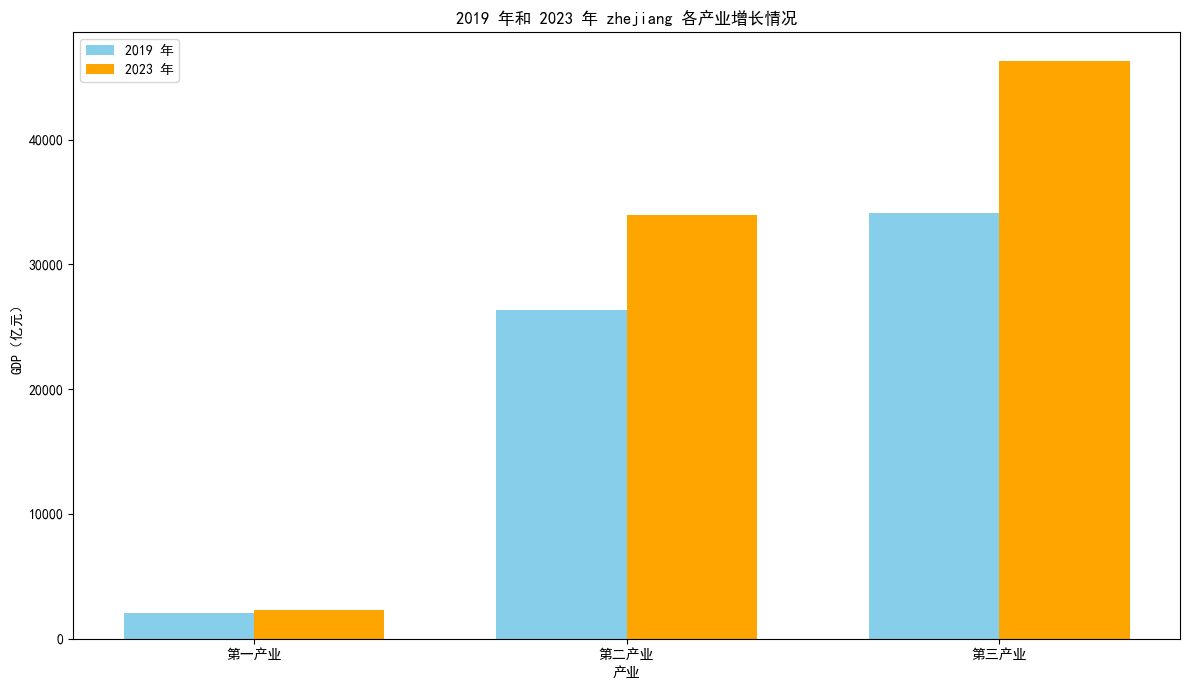

In [117]:
province_name = input("请输入想要的省份名称：")
year1_input = input("请输入想要对比的第一个年份：")
year2_input = input("请输入想要对比的第二个年份：")
draw_province_year_2(province_name, year1_input, year2_input)

### 浙江主要经济增长在于第二和第三产业，尤其是第三产业，第一产业增长极小，并随着时间推移，第一产业与第二和第三产业的增长速度差距越来越大

In [69]:
import pandas as pd

file_path = "C:/Users/haoyi/OneDrive/Desktop/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd')

print(df)

     省份  GDP（亿元）_2023  GDP（亿元）_2022  GDP（亿元）_2021  GDP（亿元）_2020  GDP（亿元）_2019  \
0    北京       43760.7       41540.9       41045.6       35943.3       35445.1   
1    天津       16737.3       16132.2       15685.1       14008.0       14055.5   
2    河北       43944.1       41988.0       40397.1       36013.8       34978.6   
3    山西       25698.2       25583.9       22870.4       17835.6       16961.6   
4   内蒙古       24627.0       23388.9       21166.0       17258.0       17212.5   
5    辽宁       30209.4       28826.1       27569.5       25011.4       24855.3   
6    吉林       13531.2       12818.1       13163.8       12256.0       11726.8   
7   黑龙江       15883.9       15831.5       14858.2       13633.4       13544.4   
8    上海       47218.7       44809.1       43653.2       38963.3       37987.6   
9    江苏      128222.2      122089.3      117392.4      102807.7       98656.8   
10   浙江       82553.2       78060.6       74040.8       64689.1       62462.0   
11   安徽       47050.6       

## 全国的选定年份的GDP增长体量和增长率

In [17]:
def all_province_year(year):
    
    data_year_all = f'GDP（亿元）_{year}'
    all_year_before = str(int(year) - 1)
    data_year_all_before = f'GDP（亿元）_{all_year_before}'
    df['增长率'] = (df[data_year_all] - df[data_year_all_before]) / df[data_year_all_before] * 100
    
    plot_data_all = df[['省份/年份', data_year_all, data_year_all_before, '增长率']]
    plot_data_all = plot_data_all.sort_values(by=data_year_all, ascending=False)
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    color = 'tab:blue'
    ax1.set_xlabel('省份')
    ax1.set_ylabel(data_year_all, color = color)
    ax1.bar(plot_data_all['省份/年份'],plot_data_all[data_year_all],color=color, label=data_year_all)
    
    ax2=ax1.twinx()
    color='tab:green'
    ax2.set_ylabel('当年 GDP 增长率', color = color)
    ax2.plot(plot_data_all['省份/年份'], plot_data_all['增长率'], color=color, marker='o', label='当年增长率')

    plt.show()


请输入你想要哪个年份的所有省份GDP柱状图: 2009


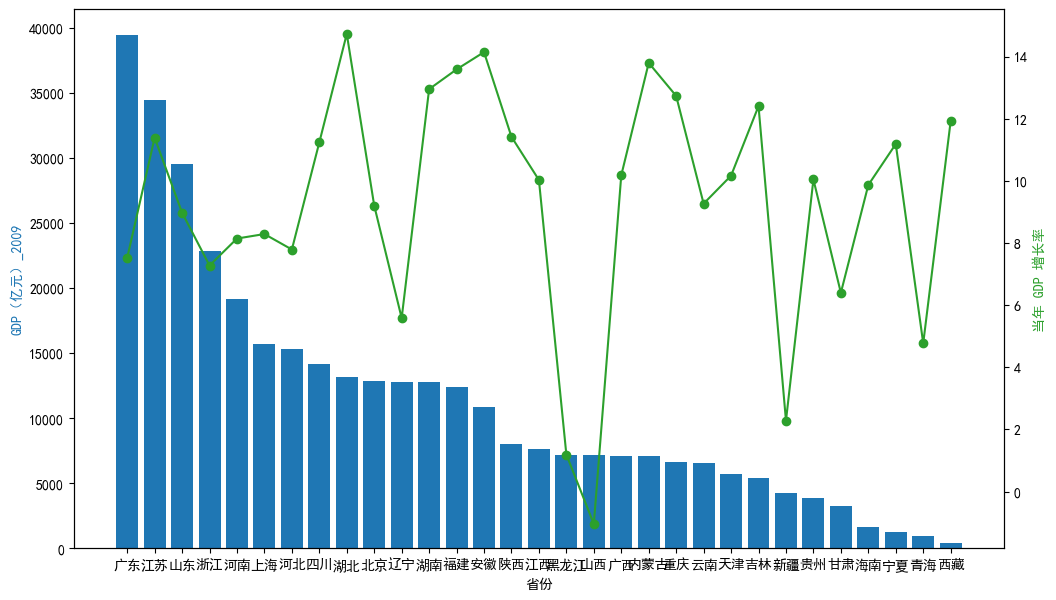

In [47]:
year_all_input = input("请输入你想要哪个年份的所有省份GDP柱状图:")
all_province_year(year_all_input)

## 所有的数据

In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


file_path = "C:/写码/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd')

file_path_yunnan = "C:/写码/要用的数据/安徽产业.xls"
df_yunnan = pd.read_excel(file_path_yunnan, engine='xlrd')

file_path_beijing = "C:/写码/要用的数据/北京产业.xls"
df_beijing = pd.read_excel(file_path_beijing, engine='xlrd')

file_path_jilin = "C:/写码/要用的数据/吉林产业.xls"
df_jilin = pd.read_excel(file_path_jilin, engine='xlrd')

file_path_sichuan = "C:/写码/要用的数据/四川产业.xls"
df_sichuan = pd.read_excel(file_path_sichuan, engine='xlrd')

file_path_anhui = "C:/写码/要用的数据/安徽产业.xls"
df_anhui = pd.read_excel(file_path_anhui, engine='xlrd')

file_path_shandong = "C:/写码/要用的数据/山东产业.xls"
df_shandong = pd.read_excel(file_path_shandong, engine='xlrd')

file_path_shanxi = "C:/写码/要用的数据/山西产业.xls"
df_shanxi = pd.read_excel(file_path_shanxi, engine='xlrd')

file_path_guangdong = "C:/写码/要用的数据/广东产业.xls"
df_guangdong = pd.read_excel(file_path_guangdong, engine='xlrd')

file_path_jiangsu = "C:/写码/要用的数据/江苏产业.xls"
df_jiangsu = pd.read_excel(file_path_jiangsu, engine='xlrd')

file_path_jiangxi = "C:/写码/要用的数据/江西产业.xls"
df_jiangxi = pd.read_excel(file_path_jiangxi, engine='xlrd')

file_path_hebei = "C:/写码/要用的数据/河北产业.xls"
df_hebei = pd.read_excel(file_path_hebei, engine='xlrd')

file_path_henan = "C:/写码/要用的数据/河南产业.xls"
df_henan = pd.read_excel(file_path_henan, engine='xlrd')

file_path_zhejiang = "C:/写码/要用的数据/浙江产业.xls"
df_zhejiang = pd.read_excel(file_path_zhejiang, engine='xlrd')

file_path_hainan = "C:/写码/要用的数据/海南产业.xls"
df_hainan = pd.read_excel(file_path_hainan, engine='xlrd')

file_path_hubei = "C:/写码/要用的数据/湖北产业.xls"
df_hubei = pd.read_excel(file_path_hubei, engine='xlrd')

file_path_hunan = "C:/写码/要用的数据/湖南产业.xls"
df_hunan = pd.read_excel(file_path_hunan, engine='xlrd')

file_path_gansu = "C:/写码/要用的数据/甘肃产业.xls"
df_gansu = pd.read_excel(file_path_gansu, engine='xlrd')

file_path_fujian = "C:/写码/要用的数据/福建产业.xls"
df_fujian = pd.read_excel(file_path_fujian, engine='xlrd')

file_path_guizhou = "C:/写码/要用的数据/贵州产业.xls"
df_guizhou = pd.read_excel(file_path_guizhou, engine='xlrd')

file_path_liaoning = "C:/写码/要用的数据/辽宁产业.xls"
df_liaoning = pd.read_excel(file_path_liaoning, engine='xlrd')

file_path_shanxi2 = "C:/写码/要用的数据/陕西产业.xls"
df_shanxi2 = pd.read_excel(file_path_shanxi2, engine='xlrd')

file_path_qinghai = "C:/写码/要用的数据/青海产业.xls"
df_qinghai = pd.read_excel(file_path_qinghai, engine='xlrd')


province_data = {
    "yunnan": pd.read_excel("C:/写码/要用的数据/云南产业.xls", engine='xlrd'),
    "beijing": pd.read_excel("C:/写码/要用的数据/北京产业.xls", engine='xlrd'),
    "jilin": pd.read_excel("C:/写码/要用的数据/吉林产业.xls", engine='xlrd'),
    "sichuan": pd.read_excel("C:/写码/要用的数据/四川产业.xls", engine='xlrd'),
    "anhui": pd.read_excel("C:/写码/要用的数据/安徽产业.xls", engine='xlrd'),
    "shandong": pd.read_excel("C:/写码/要用的数据/山东产业.xls", engine='xlrd'),
    "shanxi": pd.read_excel("C:/写码/要用的数据/山西产业.xls", engine='xlrd'),
    "guangdong": pd.read_excel("C:/写码/要用的数据/广东产业.xls", engine='xlrd'),
    "jiangsu": pd.read_excel("C:/写码/要用的数据/江苏产业.xls", engine='xlrd'),
    "jiangxi": pd.read_excel("C:/写码/要用的数据/江西产业.xls", engine='xlrd'),
    "hebei": pd.read_excel("C:/写码/要用的数据/河北产业.xls", engine='xlrd'),
    "henan": pd.read_excel("C:/写码/要用的数据/河南产业.xls", engine='xlrd'),
    "zhejiang": pd.read_excel("C:/写码/要用的数据/浙江产业.xls", engine='xlrd'),
    "hainan": pd.read_excel("C:/写码/要用的数据/海南产业.xls", engine='xlrd'),
    "hubei": pd.read_excel("C:/写码/要用的数据/湖北产业.xls", engine='xlrd'),
    "hunan": pd.read_excel("C:/写码/要用的数据/湖南产业.xls", engine='xlrd'),
    "gansu": pd.read_excel("C:/写码/要用的数据/甘肃产业.xls", engine='xlrd'),
    "fujian": pd.read_excel("C:/写码/要用的数据/福建产业.xls", engine='xlrd'),
    "guizhou": pd.read_excel("C:/写码/要用的数据/贵州产业.xls", engine='xlrd'),
    "liaoning": pd.read_excel("C:/写码/要用的数据/辽宁产业.xls", engine='xlrd'),
    "shanxi2": pd.read_excel("C:/写码/要用的数据/陕西产业.xls", engine='xlrd'),
    "qinghai": pd.read_excel("C:/写码/要用的数据/青海产业.xls", engine='xlrd')
}

## 所有的函数

In [9]:
def year_gdp_chart(year,num):
    data_year=f'GDP（亿元）_{year}'
    user_input_before=str(int(year)-1)
    data_year_before=f'GDP（亿元）_{user_input_before}'
    user_input_before_num=str(int(year)-int(num))
    data_year_before_num=f'GDP（亿元）_{user_input_before_num}'
    

    print(data_year)
    print(data_year_before)
    print(data_year_before_num)

    df['GDP增长_当年'] = (df[data_year] - df[data_year_before]) / df[data_year_before] * 100
    df['GDP增长_近几年'] = (df[data_year] - df[data_year_before_num]) / df[data_year_before_num] * 100

    plot_data = df[['省份/年份', data_year, 'GDP增长_当年', 'GDP增长_近几年']]
    plot_data = plot_data.sort_values(by=data_year, ascending=False)

    fig, ax1 = plt.subplots(figsize=(12, 7))
    #画初始图形

    color = 'tab:blue'
    ax1.set_xlabel('省份')
    ax1.set_ylabel(data_year,color=color)
    ax1.bar(plot_data['省份/年份'],plot_data[data_year],color=color, label=data_year)
    #画当年 GDP 体量的柱状图

    ax2=ax1.twinx()
    color='tab:green'
    ax2.set_ylabel('当年/近几年 GDP 增长')
    ax2.plot(plot_data['省份/年份'], plot_data['GDP增长_当年'], color=color, marker='o', label='当年增长率')
    #画当年 GDP 增长的折线图

    color='tab:red'
    ax2.plot(plot_data['省份/年份'], plot_data['GDP增长_近几年'], color=color, marker='x', label='近几年增长率')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


def draw_province_year(province, year): 
    df = province_data[province]
    detail_data = df[df['年份'] == int(year)]   

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xlabel('产业')
    ax1.set_ylabel('GDP（亿元）')
    
    industries = ['第一产业', '第二产业', '第三产业']
    gdp_values = detail_data[industries].values.flatten() 
    
    ax1.bar(industries, gdp_values, color='skyblue', label=f'{year} 年 {province} 各产业增长情况')
    
    plt.title(f'{year} 年 {province} 各产业增长情况')
    plt.legend()
    plt.show()


def draw_province_year_2(province, year1, year2):
    df = province_data[province]

    data_year1 = df[df['年份'] == int(year1)]
    data_year2 = df[df['年份'] == int(year2)]

    fig, ax = plt.subplots(figsize=(12, 7))
    
    industries = ['第一产业', '第二产业', '第三产业']
    bar_width = 0.35
    index = range(len(industries))

    gdp_values_year1 = data_year1[industries].values.flatten()
    gdp_values_year2 = data_year2[industries].values.flatten()

    ax.bar([p for p in index], gdp_values_year1, bar_width, label=f'{year1} 年', color='skyblue')

    ax.bar([p + bar_width for p in index], gdp_values_year2, bar_width, label=f'{year2} 年', color='orange')

    ax.set_xlabel('产业')
    ax.set_ylabel('GDP（亿元）')
    ax.set_title(f'{year1} 年和 {year2} 年 {province} 各产业增长情况')

    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(industries)
    ax.legend()

    plt.tight_layout()
    plt.show()

def all_province_year(year):
    
    data_year_all = f'GDP（亿元）_{year}'
    all_year_before = str(int(year) - 1)
    data_year_all_before = f'GDP（亿元）_{all_year_before}'
    df['增长率'] = (df[data_year_all] - df[data_year_all_before]) / df[data_year_all_before] * 100
    
    plot_data_all = df[['省份/年份', data_year_all, data_year_all_before, '增长率']]
    plot_data_all = plot_data_all.sort_values(by=data_year_all, ascending=False)
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    color = 'tab:blue'
    ax1.set_xlabel('省份')
    ax1.set_ylabel(data_year_all, color = color)
    ax1.bar(plot_data_all['省份/年份'],plot_data_all[data_year_all],color=color, label=data_year_all)
    
    ax2=ax1.twinx()
    color='tab:green'
    ax2.set_ylabel('当年 GDP 增长率', color = color)
    ax2.plot(plot_data_all['省份/年份'], plot_data_all['增长率'], color=color, marker='o', label='当年增长率')

    plt.show()


## 所有图表汇总

In [15]:
import pandas as pd

file_path = "C:/写码/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd')

year_input =input("请输入您想要的年份: ")
year_number_input= input("请输入你想要的年数量：")
year_input_2 = str(int(year_input) + int(year_number_input))
province_name = input("请输入想要的省份名称：")


year_gdp_chart(year_input,year_number_input)


draw_province_year_2(province_name, year_input, year_input_2)

draw_province_year(province_name,year_input)
all_province_year(year_input)

KeyboardInterrupt: Interrupted by user

In [59]:
def province_gdp_chart(province_1):
    province = str(province_1)
    
    # 打印索引检查
    print("索引列表:", df.index)
    
    # 确保索引为字符串类型
    df.index = df.index.astype(str)
    
    # 选择省份相关的行数据
    plot_data = df.loc[province]
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    # 绘制图形
    ax1.plot(plot_data.index, plot_data.values)
    plt.show()

province_input = input("请输入你想要的省份：")
province_gdp_chart(province_input)

请输入你想要的省份： 浙江


索引列表: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30'],
      dtype='object')


KeyError: '浙江'

请输入你想要的省份： 浙江


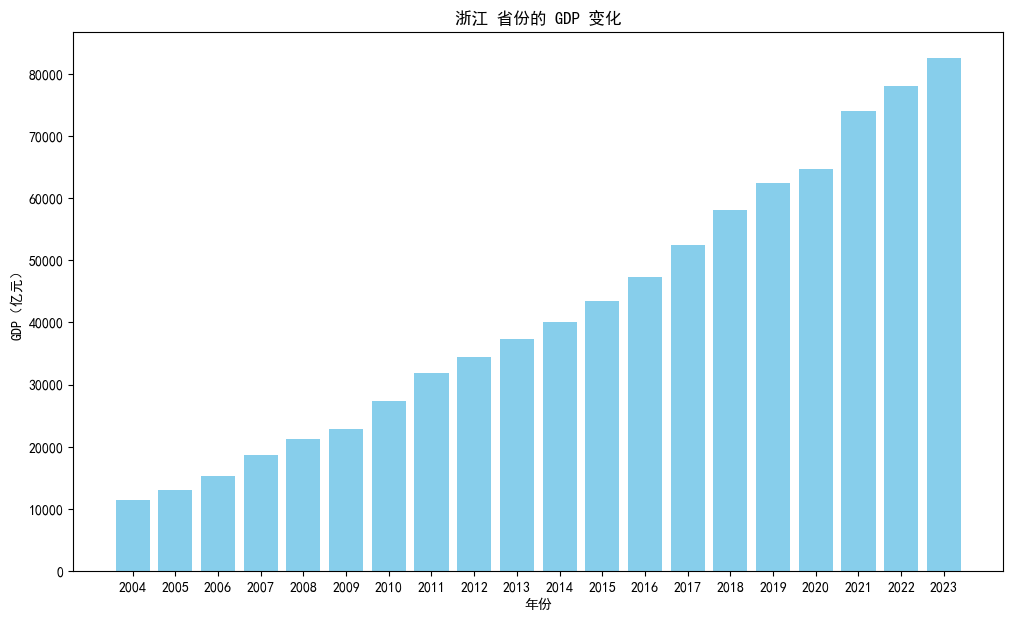

In [61]:
import matplotlib.pyplot as plt

def province_gdp_chart(province_1):
    province = str(province_1)
    
    # 找出省份
    plot_data = df[df['省份/年份'] == province]
    # 提取以 'GDP' 开头的列
    gdp_columns = [col for col in df.columns if col.startswith('GDP')]
    # 年份格式转换
    years = [int(col.split('_')[-1]) for col in gdp_columns]
    
    # 获取对应的 GDP 数值
    gdp_values = plot_data[gdp_columns].values.flatten()
    
    # 画图
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.bar(years, gdp_values, color='skyblue')
    
    # 添加标题
    ax1.set_title(f"{province} 省份的 GDP 变化")
    ax1.set_xlabel("年份")
    ax1.set_ylabel("GDP（亿元）")
    
    plt.xticks(years)
    plt.show()

province_input = input("请输入你想要的省份：")
province_gdp_chart(province_input)

请输入你想要的省份： 浙江


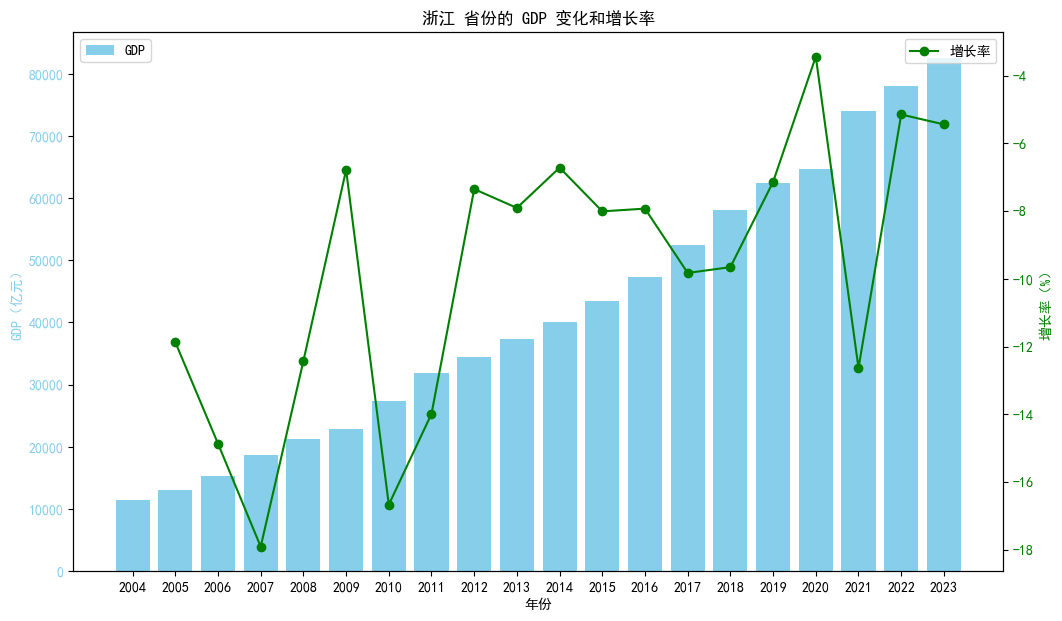

In [71]:
import matplotlib.pyplot as plt

def province_gdp_chart(province_1):
    province = str(province_1)
    
    # 找出省份数据
    plot_data = df[df['省份/年份'] == province]
    
    # 提取以 'GDP' 开头的列
    gdp_columns = [col for col in df.columns if col.startswith('GDP')]
    
    #数据处理
    years = [int(col.split('_')[-1]) for col in gdp_columns]
    gdp_values = plot_data[gdp_columns].values.flatten()
    
    # 计算增长率
    growth_rates = [None] + [(gdp_values[i] - gdp_values[i - 1]) / gdp_values[i - 1] * 100 for i in range(1, len(gdp_values))]
    

    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # 绘制柱状图
    ax1.bar(years, gdp_values, color='skyblue', label="GDP")
    ax1.set_xlabel("年份")
    ax1.set_ylabel("GDP（亿元）", color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # 绘制折线图
    ax2 = ax1.twinx()
    ax2.plot(years[:-1], growth_rates[1:], color='green', marker='o', linestyle='-', label="增长率")
    ax2.set_ylabel("增长率（%）", color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.title(f"{province} 省份的 GDP 变化和增长率")
    
    # 标出图例
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    
    plt.xticks(years)
    plt.show()

# 用户输入省份名称并调用绘图函数
province_input = input("请输入你想要的省份：")
province_gdp_chart(province_input)

请输入你想要的省份（拼音）： zhejiang


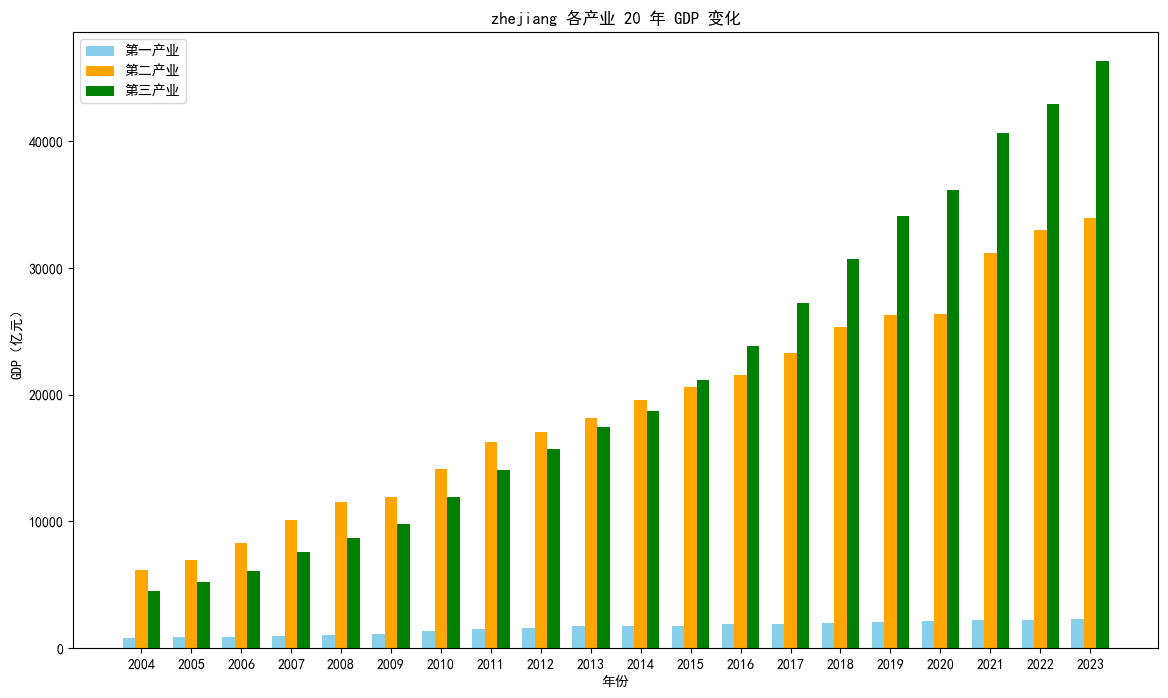

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def draw_province_industries(province):
    df = province_data.get(province)
    # 按年份排序
    df = df.sort_values(by='年份')
   
    years = df['年份'].astype(str).tolist()
    industry_1 = df['第一产业'].values
    industry_2 = df['第二产业'].values
    industry_3 = df['第三产业'].values

    # 设定图结构
    bar_width = 0.25
    indices = np.arange(len(years))
    fig, ax = plt.subplots(figsize=(14, 8))

    # 画图
    ax.bar(indices - bar_width, industry_1, bar_width, label='第一产业', color='skyblue')
    ax.bar(indices, industry_2, bar_width, label='第二产业', color='orange')
    ax.bar(indices + bar_width, industry_3, bar_width, label='第三产业', color='green')

    # 写标签
    ax.set_xlabel('年份')
    ax.set_ylabel('GDP（亿元）')
    ax.set_title(f"{province} 各产业 20 年 GDP 变化")
    ax.set_xticks(indices)
    ax.set_xticklabels(years)
    
    ax.legend()
    plt.show()

province_input = input("请输入你想要的省份（无空格全小写拼音）：")
draw_province_industries(province_input)


请输入你想要的省份（无空格全小写拼音）： zhejiang


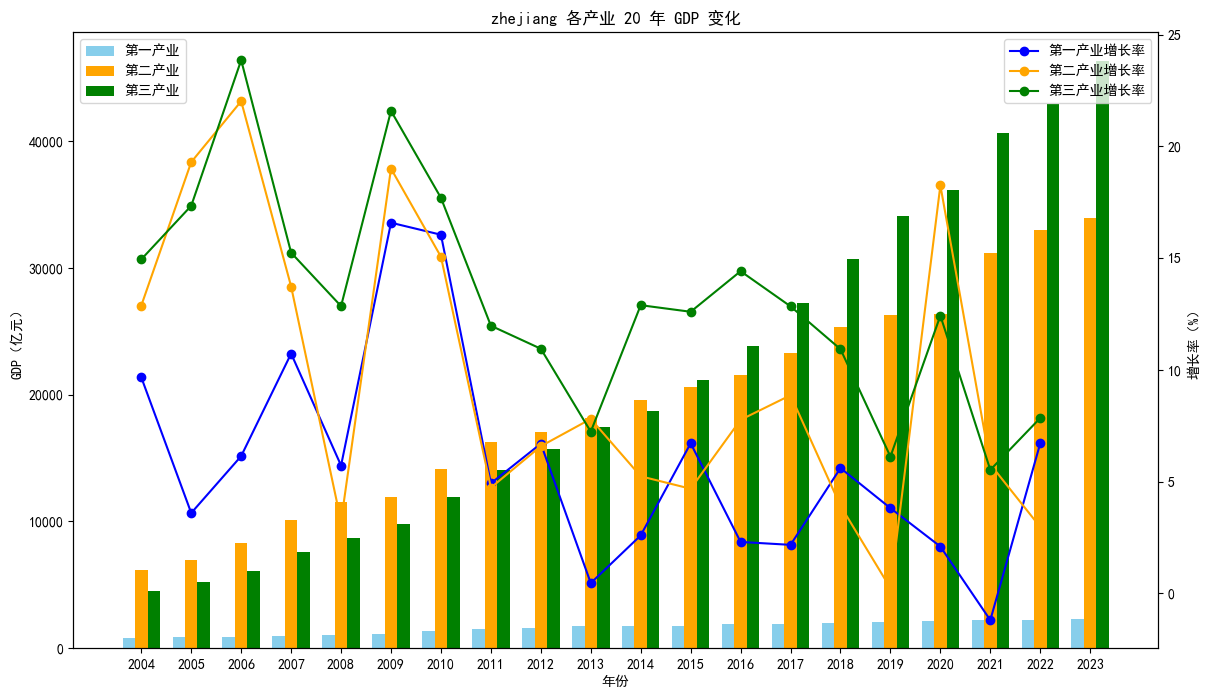

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def draw_province_industries(province):
    df = province_data.get(province)
    # 按年份排序
    df = df.sort_values(by='年份')
    
    years = df['年份'].astype(str).tolist()
    industry_1 = df['第一产业'].values
    industry_2 = df['第二产业'].values
    industry_3 = df['第三产业'].values

    # 计算增长率
    growth_rate_1 = [None] + [(industry_1[i] - industry_1[i - 1]) / industry_1[i - 1] * 100 for i in range(1, len(industry_1))]
    growth_rate_2 = [None] + [(industry_2[i] - industry_2[i - 1]) / industry_2[i - 1] * 100 for i in range(1, len(industry_2))]
    growth_rate_3 = [None] + [(industry_3[i] - industry_3[i - 1]) / industry_3[i - 1] * 100 for i in range(1, len(industry_3))]

    # 设定图结构
    bar_width = 0.25
    indices = np.arange(len(years))
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 画柱状图
    ax1.bar(indices - bar_width, industry_1, bar_width, label='第一产业', color='skyblue')
    ax1.bar(indices, industry_2, bar_width, label='第二产业', color='orange')
    ax1.bar(indices + bar_width, industry_3, bar_width, label='第三产业', color='green')

    # 设置标签和标题
    ax1.set_xlabel('年份')
    ax1.set_ylabel('GDP（亿元）')
    ax1.set_title(f"{province} 各产业 20 年 GDP 变化")
    ax1.set_xticks(indices)
    ax1.set_xticklabels(years)

    # 创建第二个 Y 轴来画增长率
    ax2 = ax1.twinx()
    ax2.plot(years[1:], growth_rate_1[1:], color='blue', marker='o', linestyle='-', label='第一产业增长率')
    ax2.plot(years[1:], growth_rate_2[1:], color='orange', marker='o', linestyle='-', label='第二产业增长率')
    ax2.plot(years[1:], growth_rate_3[1:], color='green', marker='o', linestyle='-', label='第三产业增长率')
    
    ax2.set_ylabel("增长率（%）")
    
    # 标出图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 画图表
    plt.show()

# 用户输入
province_input = input("请输入你想要的省份（无空格全小写拼音）：")
draw_province_industries(province_input)


In [ ]:
!pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 从 Excel 文件加载数据
file_path = "C:/写码/暑假数据.xls"
df = pd.read_excel(file_path, engine='xlrd', header=0, index_col=0)

# 1. 清理列名，确保只保留年份（去除 'GDP(亿元)_' 前缀）
df.columns = df.columns.str.replace('GDP\(亿元\)_', '')

# 2. 将数据从宽格式转换为长格式（省份和年份作为索引）
df_long = df.reset_index().melt(id_vars=['省份'], var_name='年份', value_name='GDP')

# 3. 清理年份列，去除无效数据（比如列名 `GDP（亿元）_2023`）
df_long = df_long[~df_long['年份'].str.contains("GDP")]

# 4. 将 '年份' 列转换为整数类型
df_long['年份'] = df_long['年份'].astype(int)

# 5. 提取省份列
df_long['省份'] = df_long['省份']

# 6. 为每个省份分别创建预测模型
def forecast_gdp_for_province(province):
    # 获取该省份的数据
    province_data = df_long[df_long['省份'] == province][['年份', 'GDP']]

    # 将数据转换为 Prophet 格式
    df_prophet = province_data.rename(columns={"年份": "ds", "GDP": "y"})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    # 初始化 Prophet 模型
    model = Prophet()

    # 拟合数据
    model.fit(df_prophet)

    # 创建未来 5 年的预测数据
    future = model.make_future_dataframe(periods=5, freq='Y')

    # 预测未来数据
    forecast = model.predict(future)

    # 可视化结果
    fig = model.plot(forecast)
    plt.title(f"{province} GDP 预测（未来 5 年）")
    plt.xlabel("年份")
    plt.ylabel("GDP（亿元）")
    plt.show()

    # 显示未来 5 年的预测值
    print(f"{province} 未来 5 年的 GDP 预测：")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

# 用户输入省份名称并调用预测函数
province_input = input("请输入你想要预测的省份：")
forecast_gdp_for_province(province_input)

